# - Set the environment

In [29]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import ffmpeg

In [20]:
ENV_DIR = '../kaggle_nflsafety'
DATA_DIR = f'{ENV_DIR}/data'

# - Get the data

In [24]:
image_labels = pd.read_csv(f'{DATA_DIR}/image_labels.csv')
sample_submission = pd.read_csv(f'{DATA_DIR}/sample_submission.csv')

test_baseline_helmets = pd.read_csv(f'{DATA_DIR}/test_baseline_helmets.csv')
test_player_tracking = pd.read_csv(f'{DATA_DIR}/test_player_tracking.csv')

train_baseline_helmets = pd.read_csv(f'{DATA_DIR}/train_baseline_helmets.csv')
train_labels = pd.read_csv(f'{DATA_DIR}/train_labels.csv')
train_player_tracking = pd.read_csv(f'{DATA_DIR}/train_player_tracking.csv')

# - Get a frame

In [33]:
def get_frame_from_video(video_path, frame):
    video_path = f"{DATA_DIR}/train/{video_path}"
    frame = frame - 1
    
    !ffmpeg \
        -hide_banner \
        -loglevel fatal \
        -nostats \
        -i $video_path -vf "select=eq(n\,$frame)" -vframes 1 frame.png
    
    img = Image.open('frame.png')
    os.remove('frame.png')
    return img

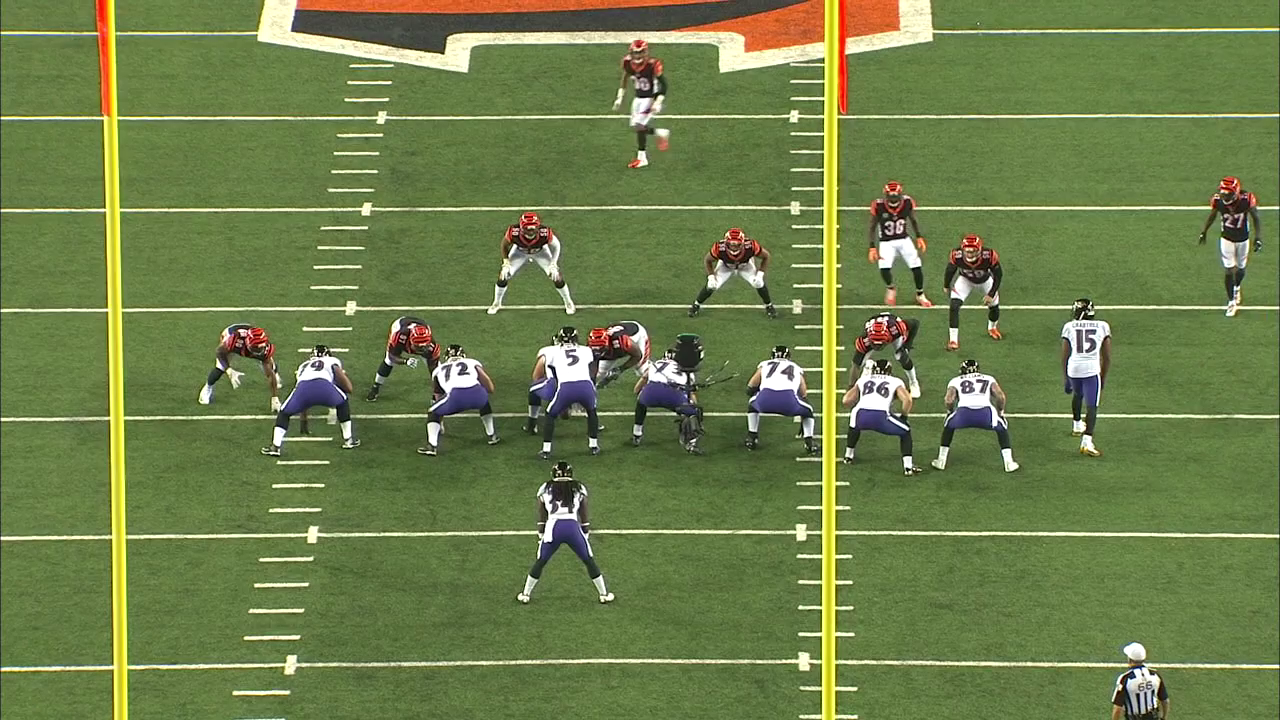

In [34]:
video_path = '57583_000082_Endzone.mp4'
frame = 1
get_frame_from_video(video_path, frame)